In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
duq_data = pd.read_csv('DUQ_hourly.csv', index_col = [0], parse_dates=[0])
duq_data

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
...,...
2018-01-01 20:00:00,1962.0
2018-01-01 21:00:00,1940.0
2018-01-01 22:00:00,1891.0


In [3]:
# просмотрим информацию о массиве: 
# тип данных float, null значения отсутствуют, запись с 2005-12-31 01:00:00 по 2018-01-02 00:00:00 с шагом в 1 час
duq_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [4]:
duq_data['DUQ_MW'].isnull().sum()

0

In [5]:
# оценим разброс значений: на вскидку выбросов нет
duq_data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


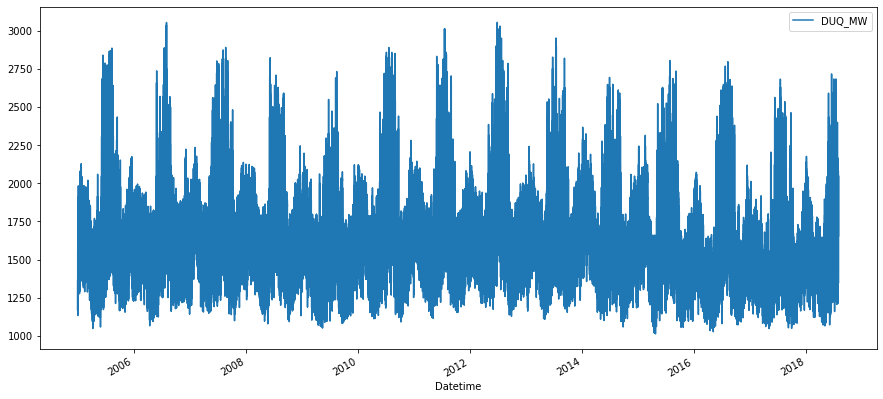

In [6]:
# оценим данные графически: выбросов также не отмечается 
duq_data.plot(figsize = ( 15, 7 ))

In [7]:
# значения даны в целочисленном варианте, что позволяем нам перейти с float на int для экономии памяти
duq_data['DUQ_MW'] = duq_data['DUQ_MW'].astype('int')
duq_data.head

<bound method NDFrame.head of                      DUQ_MW
Datetime                   
2005-12-31 01:00:00    1458
2005-12-31 02:00:00    1377
2005-12-31 03:00:00    1351
2005-12-31 04:00:00    1336
2005-12-31 05:00:00    1356
...                     ...
2018-01-01 20:00:00    1962
2018-01-01 21:00:00    1940
2018-01-01 22:00:00    1891
2018-01-01 23:00:00    1820
2018-01-02 00:00:00    1721

[119068 rows x 1 columns]>

In [53]:
# duq_data['2005-12-31 01:00:00':'2006-12-31 01:00:00']

In [8]:
# создадим свой datetime ряд
# отметим то, что наш ряд содержит 105240 значений, а данные содержат 119068
datetime_series = pd.date_range('2005-12-31 01:00:00', '2018-01-02 00:00:00', freq='H')
datetime_series

DatetimeIndex(['2005-12-31 01:00:00', '2005-12-31 02:00:00',
               '2005-12-31 03:00:00', '2005-12-31 04:00:00',
               '2005-12-31 05:00:00', '2005-12-31 06:00:00',
               '2005-12-31 07:00:00', '2005-12-31 08:00:00',
               '2005-12-31 09:00:00', '2005-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', length=105240, freq='H')

In [9]:
duq_data.index

DatetimeIndex(['2005-12-31 01:00:00', '2005-12-31 02:00:00',
               '2005-12-31 03:00:00', '2005-12-31 04:00:00',
               '2005-12-31 05:00:00', '2005-12-31 06:00:00',
               '2005-12-31 07:00:00', '2005-12-31 08:00:00',
               '2005-12-31 09:00:00', '2005-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=119068, freq=None)

In [10]:
# выведем дату в отдельный столбец
duq_data['date'] = duq_data.index
duq_data

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458,2005-12-31 01:00:00
2005-12-31 02:00:00,1377,2005-12-31 02:00:00
2005-12-31 03:00:00,1351,2005-12-31 03:00:00
2005-12-31 04:00:00,1336,2005-12-31 04:00:00
2005-12-31 05:00:00,1356,2005-12-31 05:00:00
...,...,...
2018-01-01 20:00:00,1962,2018-01-01 20:00:00
2018-01-01 21:00:00,1940,2018-01-01 21:00:00
2018-01-01 22:00:00,1891,2018-01-01 22:00:00


In [11]:
# посмотрим количество уникальных значений
duq_data['date'].unique().shape[0]

119064

In [12]:
duq_data['date'].value_counts()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
                      ..
2007-04-01 02:00:00    1
2011-10-25 02:00:00    1
2016-05-19 02:00:00    1
2005-10-17 21:00:00    1
2013-06-07 22:00:00    1
Name: date, Length: 119064, dtype: int64

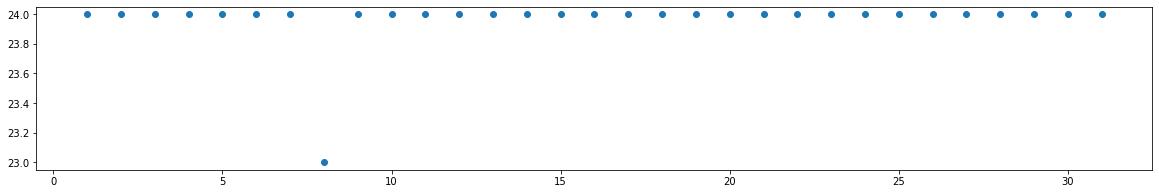

In [13]:
# при этом 8 марта было меньше измерений, чем в другие дни
# все эти аномалии вернее всего связаны с переходом на зимнее-летнее время
day_H=duq_data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

In [14]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head(5)

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [15]:
#brent_data['date'] = brent_data.index
#brent_data

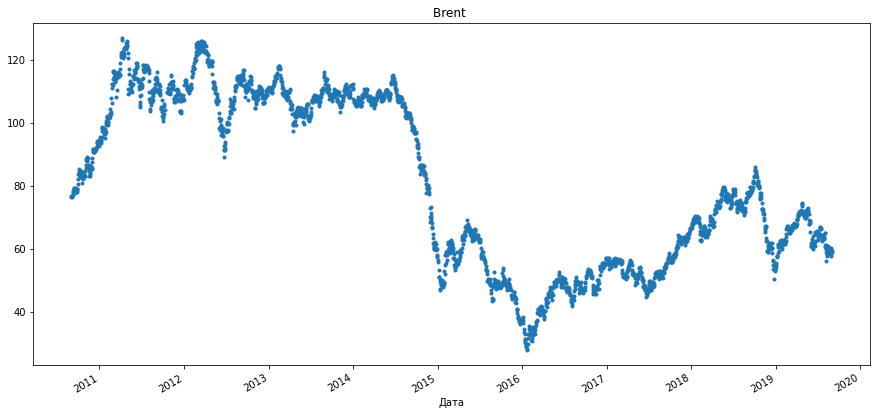

In [16]:
brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')

In [17]:
brent_data.asfreq('5D', method ='pad').head(10)

,Значение
Дата,


In [36]:
# ресемплинг по неделям
brent_data_7D = brent_data.resample("7D").sum().head(10)
brent_data_7D

,Значение
Дата,
2010-09-01,537.21
2010-09-08,470.20
2010-09-15,471.33
2010-09-22,470.64
2010-09-29,498.23
2010-10-06,503.78
2010-10-13,499.37
2010-10-20,498.42
2010-10-27,503.53


In [26]:
# ресемплинг по месяцам
brent_data_M = brent_data.resample("M").sum().head(10)
brent_data_M

Text(0.5, 1.0, 'Выборка по месяцам')

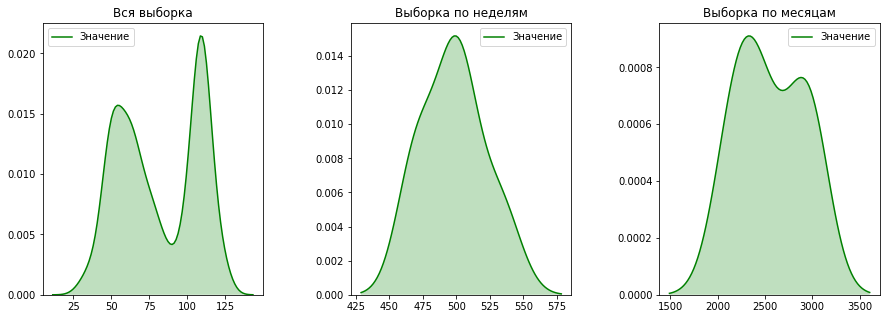

In [38]:
plt.figure(figsize = ([15,5]))
plt.subplots_adjust(wspace=0.4, hspace=0.35)
plt.subplot(1,3,1)
sns.kdeplot(brent_data['Значение'], shade=True, color="g")
plt.title('Вся выборка')
plt.subplot(1,3,2)
sns.kdeplot(brent_data_7D['Значение'], shade=True, color="g")
plt.title('Выборка по неделям')
plt.subplot(1,3,3)
sns.kdeplot(brent_data_M['Значение'], shade=True, color="g")
plt.title('Выборка по месяцам')